In [ ]:
from google.colab import files
files.upload()

In [24]:
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import math
from math import floor, ceil
from statsmodels.tsa.stattools import adfuller

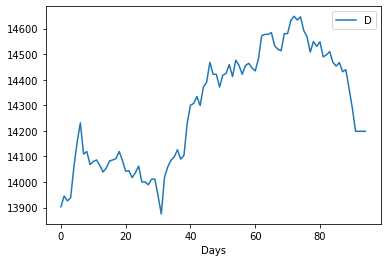

1. ADF :  -1.7099337093239808
2. P-Value :  0.42600173560981686
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 94
5. Critical Values :
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781



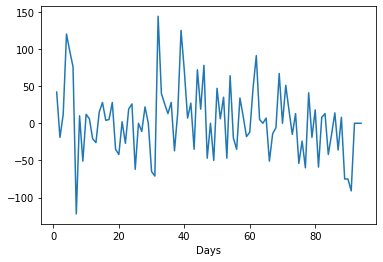

1. ADF :  -8.75189285157244
2. P-Value :  2.8219382017616516e-14
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 93
5. Critical Values :
	 1% :  -3.502704609582561
	 5% :  -2.8931578098779522
	 10% :  -2.583636712914788



In [28]:
#Membaca file
df = pd.read_excel('Data Kurs.xlsx')
 
#klo ganti data ganti juga 'data_pakai' nya
data_pakai = df['kurs tengah']
 
#Uji Stasioneritas Data
 
#plot data
data_pakai.plot()
plt.legend('Data')
plt.xlabel('Days')
plt.show()
 
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data_pakai)
print()
 
dftest = adfuller(data_pakai, autolag = 'AIC')
if dftest[1] > 0.05 :
  #Differencing Data Series
  diff = data_pakai.diff()
  plt.plot(diff)
  plt.xlabel('Days')
  plt.show()
  ad_test(diff[1:])
  print()
 
x_train_asli, x_test_asli = train_test_split(data_pakai,
                                             test_size=0.1,
                                             random_state=None,
                                             shuffle=False)
 
x_test_asli = x_test_asli.dropna().reset_index(drop=True)
data_training_test_asli = pd.concat([x_train_asli,x_test_asli], axis=1)
data_training_test_asli.columns = ['data training', 'data testing']

In [30]:
if dftest[1] > 0.05 :
  x_train, x_test = train_test_split(diff,
                                     test_size=0.1,
                                     random_state=None,
                                     shuffle=False)
else:
  x_train, x_test = train_test_split(data_pakai,
                                     test_size=0.1,
                                     random_state=None,
                                     shuffle=False)

#Menampilkan Data
x_train = x_train.dropna().reset_index(drop=True)
x_test = x_test.dropna().reset_index(drop=True)
data_training_test = pd.concat([x_train,x_test], axis=1)
data_training_test.columns = ['data training', 'data testing']
display(data_training_test)

#Memisahkan atribut dan label pada dataset
data_training = data_training_test['data training']
data_test = data_training_test['data testing']
data_testing = data_test.dropna()
data_training_asli = data_training_test_asli['data training']
data_test_asli = data_training_test_asli['data testing']
data_testing_asli = data_test_asli.dropna()

x1 = []
for i in range (len(data_training)-1):
  absolut1 = abs(data_training[i+1]-data_training[i])
  x1.append(absolut1)
  
#menampilkan nilai absolut data_training
#display(x1)
rata2_data1=np.mean(x1)
setengah_rata2_data1=rata2_data1/2
max_data1 = data_training.max()
min_data1 = data_training.min()
print('===============================================================')
print('Rata - rata :',rata2_data1)
print('===============================================================')
print('Setengah Rata-rata : ',setengah_rata2_data1)
print('===============================================================')
print('Nilai Max :',max_data1)
print('===============================================================')
print('Nilai Min :',min_data1)

,data training,data testing
0,42.0,-15.0
1,-19.0,14.0
2,12.0,-36.0
3,120.0,8.0
4,97.0,-75.0
5,76.0,-75.0
6,-122.0,-91.0
7,10.0,0.0
8,-51.0,0.0
9,12.0,0.0


Rata - rata : 51.325301204819276
Setengah Rata-rata :  25.662650602409638
Nilai Max : 144.0
Nilai Min : -122.0


In [31]:
#Pembulatan
def pembulatan(x):
  if x >= 0.1 and x <= 1.0:
    f = round(x,1)
    return f
  elif x >= 1.1 and x <= 10:
    f = round(x)
    return f
  elif x >= 10.1 and x <= 100:
    f = x / 10
    f = round(f)*10
    return f
  elif x >= 100.1 and x <= 1000:
    f = x / 100
    f = round(f)*100
    return f

n = pembulatan(setengah_rata2_data1)
print('panjang interval : ',n)

panjang interval :  30


In [38]:
#Menentukan banyak interval
s = (max_data1-min_data1)/ n
banyak_interval = math.ceil(s)
print('Banyaknya interval: ',banyak_interval)
print('===============================================================')
print('Interval :')
u=[range(math.floor(min_data1+i*n),math.floor(min_data1+(i+1)*n)) for i in range(banyak_interval)]
for i in range(banyak_interval):
  print(f'u{str([i+1])}:', u[i])

Banyaknya interval:  9
Interval :
u[1]: range(-122, -92)
u[2]: range(-92, -62)
u[3]: range(-62, -32)
u[4]: range(-32, -2)
u[5]: range(-2, 28)
u[6]: range(28, 58)
u[7]: range(58, 88)
u[8]: range(88, 118)
u[9]: range(118, 148)


In [39]:
#untuk menentukan nilai tengah dari interval
nilai_tengah = [(math.floor(min_data1+i*n)+math.floor(min_data1+(i+1)*n))/2 for i in range(banyak_interval)]
print('Nilai Tengah: ')
for i in range(banyak_interval):
  print(f'm{str([i+1])}:',nilai_tengah[i])

Nilai Tengah: 
m[1]: -107.0
m[2]: -77.0
m[3]: -47.0
m[4]: -17.0
m[5]: 13.0
m[6]: 43.0
m[7]: 73.0
m[8]: 103.0
m[9]: 133.0


In [40]:
#Fuzifikasi
def Fuzifikasi(data):
  list1 =[]
  for i in range (len(data)):
    for j in range (banyak_interval):
      if int(data[i]) in u[j]:
        list1.append('A'+str(j+1))
  return list1

pd.set_option('max_row', None)
data1 = pd.DataFrame(Fuzifikasi(data_training), columns=['Fuzifikasi'])
data2 = pd.concat([data_training,data1], axis=1)
print('Fuzifikasi :')
display(data2)

Fuzifikasi :


,data training,Fuzifikasi
0,42.0,A6
1,-19.0,A4
2,12.0,A5
3,120.0,A9
4,97.0,A8
5,76.0,A7
6,-122.0,A1
7,10.0,A5
8,-51.0,A3
9,12.0,A5


In [41]:
#FLR
def curentstage(data):
  list2 =[]
  for i in range (len(data)-1):
    for j in range (banyak_interval):
      if int(data[i]) in u[j]:
        list2.append('A'+str(j+1))
  return list2

def nextstage(data):
  list3 = []
  for i in range (len(data)-1):
    for j in range (banyak_interval):
      if int(data[i+1]) in u[j]:
        list3.append('A'+str(j+1)) 
  return list3

def nilaitengah(data):
  list4 = []
  for i in range (len(data)-1):
    for j in range (banyak_interval):
      if int(data[i+1]) in u[j]:
        list4.append(str(int(nilai_tengah[j])))
  return list4

list2_series = pd.DataFrame(curentstage(data_training), columns=['Curent Stage'])
list3_series = pd.DataFrame(nextstage(data_training), columns=['Next Stage'])
list4_series = pd.DataFrame(nilaitengah(data_training), columns=['Nilai Tengah'])
df_FLR = pd.concat([list2_series, list3_series], axis=1)
print('FLR :')
display(df_FLR)

FLR :


,Curent Stage,Next Stage
0,A6,A4
1,A4,A5
2,A5,A9
3,A9,A8
4,A8,A7
5,A7,A1
6,A1,A5
7,A5,A3
8,A3,A5
9,A5,A5


In [42]:
#FLRG
x1_FLRG = pd.DataFrame([])
for i in range(banyak_interval):
  test = 'A' + str(i+1)
  nj = ''
  for j in range(len(df_FLR)):
    if df_FLR['Curent Stage'][j] == test:
      nj += ' ' + df_FLR['Next Stage'][j]+','
  nj_series = pd.Series(nj)
  test_df = pd.Series(test)
  x2_FLRG = pd.concat([test_df,nj_series],axis=1)
  x1_FLRG = pd.concat([x1_FLRG,x2_FLRG], ignore_index=True)
x1_FLRG.columns = ['CSFLRG','NSFLRG']
print('FLRG :')
pd.set_option('max_colwidth',None)
display(x1_FLRG)

FLRG :


,CSFLRG,NSFLRG
0,A1,"A5,"
1,A2,"A2, A9,"
2,A3,"A5, A3, A5, A5, A5, A7, A5, A6, A7, A6, A4, A4, A6, A5,"
3,A4,"A5, A4, A5, A5, A5, A3, A4, A6, A4, A7, A5, A3, A5,"
4,A5,"A9, A3, A5, A4, A6, A5, A6, A4, A5, A3, A4, A5, A2, A5, A6, A9, A5, A3, A7, A3, A6, A4, A5, A5, A3, A6, A4, A3, A3, A5, A3,"
5,A6,"A4, A5, A3, A5, A3, A5, A3, A5, A8, A5, A4,"
6,A7,"A1, A5, A5, A3, A4, A5,"
7,A8,"A7, A5,"
8,A9,"A8, A6, A7,"


In [43]:
#Defuzzifikasi
d = pd.DataFrame([])
list5 = []
for i in range(banyak_interval):
  list5.append([])
  test = 'A' + str(i+1)
  nj = ''
  for j in range(len(df_FLR)):
    if df_FLR['Curent Stage'][j] == test:
      nj += ' ' + str(int(list4_series['Nilai Tengah'][j])) + ','
      list5[i].append(int(list4_series['Nilai Tengah'][j]))
  if nj == '':
    nj = str(int(nilai_tengah[i]))
    list5[i].append(int(nilai_tengah[i]))
  nj_series = pd.Series(nj)
  test_df = pd.Series(test)
  contoh2 = pd.concat([test_df,nj_series],axis=1)
  d = pd.concat([d,contoh2], ignore_index=True)

pd.set_option('max_colwidth',None)
d.columns = ['FCS','M']
print('Defuzifikasi :')
display(d)

Defuzifikasi :


,FCS,M
0,A1,"13,"
1,A2,"-77, 133,"
2,A3,"13, -47, 13, 13, 13, 73, 13, 43, 73, 43, -17, -17, 43, 13,"
3,A4,"13, -17, 13, 13, 13, -47, -17, 43, -17, 73, 13, -47, 13,"
4,A5,"133, -47, 13, -17, 43, 13, 43, -17, 13, -47, -17, 13, -77, 13, 43, 133, 13, -47, 73, -47, 43, -17, 13, 13, -47, 43, -17, -47, -47, 13, -47,"
5,A6,"-17, 13, -47, 13, -47, 13, -47, 13, 103, 13, -17,"
6,A7,"-107, 13, 13, -47, -17, 13,"
7,A8,"73, 13,"
8,A9,"103, 43, 73,"


masukan berapa banyak nilai C :5
0    61.528293
dtype: float64
Data ke 1
Dengan optimasi nilai RMSE diperoleh c:  1.1


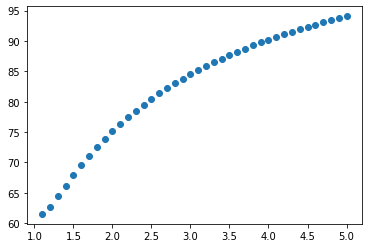

In [44]:
#Mencari nilai C
o = int(input('masukan berapa banyak nilai C :'))
c = [k/10 for k in range(11,(o*10)+1)]
list_RMSE = []
for y in range(len(c)):
  list6 = []
  for i in range(banyak_interval):
    list6.append([])
    for j in range(len(list5[i])):
      wt = pow(c[y],j)
      list6[i].append(wt)

  panjang = []
  for i in list5:
    panjang.append(len(i))
  matriks = []
  for i in range(len(list5)):
    total = 0
    for j in range(panjang[i]):
      total += list5[i][j]*list6[i][j]
    matriks.append(total)
    list7 = (pd.DataFrame(list6)).sum(axis=1)

  list8 = []
  for i in range(len(matriks)):
    list8.append(matriks[i]/list7[i])

  def label31():
    list31 =[]
    for i in range (len(data_testing)):
      for j in range (banyak_interval):
        if int(data_testing[i]) in u[j]:
          list31.append('A'+str(j+1))
    return list31

  def label32():
    list32 = ['NaN']
    for i in range (1, len(data_testing)):
      list32.append(df_FLR['Curent Stage'][i-1])
    return list32

  def label33(data):
    list33 = ['NaN']
    for i in range (1, len(data)):
      for j in range (banyak_interval):
        if int(data[i-1]) in u[j]:
          list33.append(float(list8[j]))
    return list33

  list31_series = pd.DataFrame(label31(), columns=['Fuzifikasi'])
  list32_series = pd.DataFrame(label32(), columns=['Noname1'])
  list33_series = pd.DataFrame(label33(data_testing), columns=['Peramalan'])

  def PeramalanAsli(data1,data2):
    list55= ['NaN']
    for i in range(1, len(label33(data1))):
      jumlah = label33(data1)[i] + data2[i-1]
      list55.append(jumlah)
    return list55

  #RMSE Training
  def Rmse(x,y):
    x, y = np.array(x), np.array(y)
    MSE = np.square(np.subtract(x,y)).mean() 
    return math.sqrt(MSE)

  list51_series = pd.DataFrame(PeramalanAsli(data_testing,data_testing_asli), columns=['Peramalan asli'])

  if dftest[1] > 0.05 :
    df_Peramalan_testing = pd.concat([data_testing[:len(list51_series)], list31_series, list33_series, list51_series], axis=1)
    RMSE_test = Rmse(data_testing_asli[1:len(list51_series)], df_Peramalan_testing['Peramalan asli'][1:])
  else:
    df_Peramalan_testing = pd.concat([data_testing[:len(list51_series)], list31_series, list33_series], axis=1)
    RMSE_test = Rmse(data_testing_asli[1:len(list51_series)],df_Peramalan_testing['Peramalan'][1:])
    
  list_RMSE.append(RMSE_test)
  list_RMSE_df = pd.DataFrame(list_RMSE)
  list_c = [k/10 for k in range(11,(o*10)+1)]

print(list_RMSE_df.min())
for i in range (len(list_RMSE)):
  if list_RMSE_df.min()[0] == list_RMSE[i]:
    print("Data ke", i+1)
    print("Dengan optimasi nilai RMSE diperoleh c: ", list_c[i])

print('===============================================================')
plt.scatter(list_c,list_RMSE_df)
#list_RMSE_df

In [45]:
list6 = []
c = float(input('Masukan nilai C : '))
for i in range(banyak_interval):
  list6.append([])
  for j in range(len(list5[i])):
    wt = pow(c,j)
    list6[i].append(wt)

panjang = []
for i in list5:
  panjang.append(len(i))
matriks = []
for i in range(len(list5)):
  total = 0
  for j in range(panjang[i]):
    total += list5[i][j]*list6[i][j]
  matriks.append(total)
  list7 = (pd.DataFrame(list6)).sum(axis=1)

list8 = []
for i in range(len(matriks)):
  list8.append(matriks[i]/list7[i])
print()
list8_series = pd.DataFrame(list8, columns=['Peramalan'])

fuzi1=[]
for i in range(banyak_interval):
  fuzi = 'A'+str(i+1)
  fuzi1.append(fuzi)
fuzi_series = pd.DataFrame(fuzi1, columns=['Fuzi Set'])

Tabel1 = pd.concat([fuzi_series,list8_series], axis=1)
display(Tabel1)

Masukan nilai C : 1.1



,Fuzi Set,Peramalan
0,A1,13.000000
1,A2,33.000000
2,A3,20.835320
3,A4,4.096673
4,A5,-6.308180
5,A6,3.198732
6,A7,-18.596076
7,A8,41.571429
8,A9,72.093656


In [22]:
def label25():
  list25 = ['NaN']
  for i in range (1, len(data_training)):
    list25.append(df_FLR['Curent Stage'][i-1])
  return list25

def label26():
  list26 = ['NaN']
  for i in range (1, len(data_training)):
    for j in range (banyak_interval):
      if int(data_training[i-1]) in u[j]:
        list26.append(float(list8[j]))
  return list26

def PeramalanAsli(data1,data2):
  list55= ['NaN']
  for i in range(1, len(data1)):
    jumlah = label33(data1)[i] + data2[i]
    list55.append(jumlah)
  return list55

#RMSE Training
def Rmse(x,y):
  x, y = np.array(x), np.array(y)
  MSE = np.square(np.subtract(x,y)).mean() 
  return math.sqrt(MSE)

#MAPE Training
def mape(x, y): 
  x, y = np.array(x), np.array(y)
  return np.mean(np.abs((x - y) / x)) * 100

list24_series = pd.DataFrame(Fuzifikasi(data_training), columns=['Fuzifikasi'])
list25_series = pd.DataFrame(label25(), columns=['Noname1'])
list26_series = pd.DataFrame(label26(), columns=['Peramalan'])
list55_series = pd.DataFrame(PeramalanAsli(data_training,data_training_asli), columns=['Peramalan Asli'])

if dftest[1] > 0.05 :
  df_Peramalan = pd.concat([data_training, list24_series, list26_series, list55_series], axis=1)
  print('Peramalan Data Training :')
  display(df_Peramalan)
  print('===============================================================')
  print('RMSE Data Training:')
  display(Rmse(data_training_asli[2:], df_Peramalan['Peramalan Asli'][1:]))
  print('===============================================================')
  print('MAPE Data Training:')
  display(mape(data_training_asli[2:], df_Peramalan['Peramalan Asli'][1:]))
  print('===============================================================')
else:
  df_Peramalan = pd.concat([data_training, list24_series, list26_series], axis=1)
  print('Peramalan Data Training :')
  display(df_Peramalan)
  print('===============================================================')
  print('RMSE Data Training:')
  display(Rmse(data_training_asli[1:],df_Peramalan['Peramalan'][1:]))
  print('===============================================================')
  print('MAPE Data Training:')
  display(mape(data_training_asli[1:], df_Peramalan['Peramalan'][1:]))
  print('===============================================================')


Peramalan Data Training :


,data training,Fuzifikasi,Peramalan,Peramalan Asli
0,42.0,A6,NaN,NaN
1,-19.0,A4,3.19873,13948.2
2,12.0,A5,4.09667,13930.1
3,120.0,A9,-6.30818,13931.7
4,97.0,A8,72.0937,14130.1
5,76.0,A7,41.5714,14196.6
6,-122.0,A1,-18.5961,14212.4
7,10.0,A5,13,14122
8,-51.0,A3,-6.30818,14112.7
9,12.0,A5,20.8353,14088.8


RMSE Data Training:


43.5101032986412

MAPE Data Training:


0.23323692643351235

In [50]:
iterasi = int(input("Berapa hari Peramalan: "))
for iterasi_ke in range(0,iterasi):
  if iterasi_ke == 0:
    ff = pd.DataFrame(data_testing)
    ba = pd.DataFrame(data_testing_asli)
    if dftest[1] > 0.05 :
      data_testing_baru = data_testing
      data_testing_asli_baru = data_testing_asli
    else:
      data_testing_baru = data_testing
      data_testing_asli_baru = data_testing_asli
  else:
    ff = pd.DataFrame(data_testing_baru)
    ba = pd.DataFrame(data_testing_asli_baru)
    if dftest[1] > 0.05 :
      data_testing_baru = data_testing_baru
      data_testing_asli_baru = data_testing_asli_baru
    else:
      data_testing_baru = data_testing_baru
      data_testing_asli_baru = data_testing_asli_baru
  
  #Fuzifikasi testing
  def Fuzifikasi1(data):
    list1 =[]
    for i in range (len(data)):
      for j in range (banyak_interval):
        if int(data[i]) in u[j]:
          list1.append('A'+str(j+1))
    return list1
  pd.set_option('max_row', None)
  Fuzifikasi = pd.DataFrame(Fuzifikasi1(data_testing_baru), columns=['Fuzifikasi'])

  #FLR_testing
  list28_series = pd.DataFrame(curentstage(data_testing_baru), columns=['Curent Stage'])
  list29_series = pd.DataFrame(nextstage(data_testing_baru), columns=['Next Stage'])
  list30_series = pd.DataFrame(nilaitengah(data_testing_baru), columns=['Nilai Tengah'])
  df_FLR_testing_baru = pd.concat([list28_series, list29_series], axis=1)

  def label32(data):
    list32 = ['NaN']
    for i in range (1, len(data)):
      list32.append(df_FLR_testing_baru['Curent Stage'][i-1])
    return list32

  def label33(data):
    list33 = ['NaN']
    for i in range (1, len(data)):
      for j in range (banyak_interval):
        if int(data[i-1]) in u[j]:
          list33.append(float(list8[j]))
    return list33

  def PeramalanAsli(data1,data2):
    list55= ['NaN']
    for i in range(1, len(data1)):
      jumlah = label33(data1)[i] + data2[i-1]
      list55.append(jumlah)
    return list55
  
  list31_series = pd.DataFrame(Fuzifikasi1(data_testing_baru), columns=['Fuzifikasi'])
  list32_series = pd.DataFrame(label32(data_testing_baru), columns=['Noname1'])
  list33_series = pd.DataFrame(label33(data_testing_baru), columns=['Peramalan'])
  list51_series = pd.DataFrame(PeramalanAsli(data_testing_baru,data_testing_asli_baru), columns=['Peramalan asli'])

  if dftest[1] > 0.05 :
    df_Peramalan_testing = pd.concat([data_testing_baru, list31_series, list33_series, list51_series], axis=1)
    RMSE_Testing_Baru = Rmse(data_testing_asli_baru[1:len(data_testing_asli)], df_Peramalan_testing['Peramalan asli'][1:len(data_testing_asli)])
    MAPE_Testing_Baru = mape(data_testing_asli_baru[1:len(data_testing_asli)], df_Peramalan_testing['Peramalan asli'][1:len(data_testing_asli)])
  else:
    df_Peramalan_testing = pd.concat([data_testing_baru, list31_series, list33_series], axis=1)
    RMSE_Testing_Baru = Rmse(data_testing_asli_baru[1:len(data_testing_asli)],df_Peramalan_testing['Peramalan'][1:len(data_testing_asli)])
    MAPE_Testing_Baru = mape(data_testing_asli_baru[1:len(data_testing_asli)], df_Peramalan_testing['Peramalan'][1:len(data_testing_asli)])
  
  data2 = df_Peramalan_testing['Peramalan'][len(df_Peramalan_testing)-1:].reset_index()
  data22 = data2.drop(columns=['index'], axis=1)
  data22.columns=['data testing']
  fg = ff.append(data22).reset_index()
  data_testing_baru = fg['data testing'].drop(columns=['index'])

  if dftest[1] > 0.05 :
    data3 = df_Peramalan_testing['Peramalan asli'][len(df_Peramalan_testing)-1:].reset_index()
    data33 = data3.drop(columns=['index'], axis=1)
    data33.columns=['data testing']
    bb = ba.append(data33).reset_index()
    data_testing_asli_baru = bb['data testing'].drop(columns=['index'])
  else:
    data3 = df_Peramalan_testing['Peramalan'][len(df_Peramalan_testing)-1:].reset_index()
    data33 = data3.drop(columns=['index'], axis=1)
    data33.columns=['data testing']
    bb = ba.append(data33).reset_index()
    data_testing_asli_baru = bb['data testing'].drop(columns=['index'])

print('===============================================================')
print('Tabel Fuzifikasi Data Testing')
print()
display(Fuzifikasi)

print('===============================================================')
print('Tabel FLR Data Testing')
print()
display(df_FLR_testing_baru)

if dftest[1] > 0.05 :
  print('Peramalan Data Testing :')
  display(df_Peramalan_testing)
  print('===============================================================')
  print('RMSE Data Testing:')
  display(RMSE_Testing_Baru)
  print('===============================================================')
  print('MAPE Data Testing:')
  display(MAPE_Testing_Baru)
  print('===============================================================')
else:
  print('Peramalan Data Testing :')
  display(df_Peramalan_testing)
  print('===============================================================')
  print('RMSE Data Testing:')
  display(RMSE_Testing_Baru)
  print('===============================================================')
  print('MAPE Data Testing:')
  display(MAPE_Testing_Baru)
  print('===============================================================')

print()
print('peramalan hari ke: ',iterasi)
ramal = df_Peramalan_testing[len(df_Peramalan_testing)-iterasi:].reset_index()
display(ramal.drop(columns=['index']))

Berapa hari Peramalan: 5
Tabel Fuzifikasi Data Testing



,Fuzifikasi
0,A4
1,A5
2,A3
3,A5
4,A2
5,A2
6,A2
7,A5
8,A5
9,A5


Tabel FLR Data Testing



,Curent Stage,Next Stage
0,A4,A5
1,A5,A3
2,A3,A5
3,A5,A2
4,A2,A2
5,A2,A2
6,A2,A5
7,A5,A5
8,A5,A5
9,A5,A4


Peramalan Data Testing :


,data testing,Fuzifikasi,Peramalan,Peramalan asli
0,-15,A4,NaN,NaN
1,14,A5,4.09667,14457.1
2,-36,A3,-6.30818,14460.7
3,8,A5,20.8353,14451.8
4,-75,A2,-6.30818,14432.7
5,-75,A2,33,14397
6,-91,A2,33,14322
7,0,A5,33,14231
8,0,A5,-6.30818,14191.7
9,0,A5,-6.30818,14191.7


RMSE Data Testing:


61.528293360693944

MAPE Data Testing:


0.3101995761342072


peramalan hari ke:  5


,data testing,Fuzifikasi,Peramalan,Peramalan asli
0,0,A5,-6.30818,14191.7
1,-6.30818,A4,-6.30818,14191.7
2,-6.30818,A4,4.09667,14195.8
3,4.09667,A5,4.09667,14195.8
4,4.09667,A5,-6.30818,14189.5
